<a href="https://colab.research.google.com/github/fabrizio25504/UNMSM_Quimica_general/blob/main/Cinetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.2 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# Molecula sis

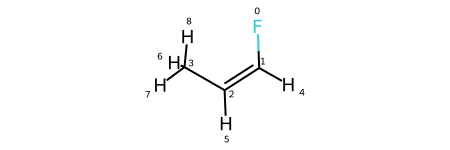

In [39]:
smiles = "F\C=C/C"
mol_cis = Chem.MolFromSmiles(smiles)
mol_cis = Chem.AddHs(mol_cis)
Chem.AllChem.EmbedMolecule(mol_cis,useRandomCoords=False, randomSeed = 117)
Chem.MolToXYZFile(mol_cis,"cis.xyz")
mol_cis

In [40]:
cat cis.xyz

9

F      1.278133    1.454392    0.361707
C      1.324428    0.114406    0.086771
C      0.211875   -0.600289   -0.107579
C     -1.080091    0.141775   -0.008462
H      2.264732   -0.419036    0.015914
H      0.255235   -1.675106   -0.327775
H     -1.411267    0.291329    1.031244
H     -1.860128   -0.435483   -0.531530
H     -0.982917    1.128011   -0.520291


In [43]:
from pyscf import gto, scf

In [44]:
mol_cis1 = gto.M(atom="cis.xyz")

In [55]:
# set basis set
mol_cis1.basis = "6-31G"

# set the functional
mf = mol_cis1.KS()
mf.xc = 'b3lyp'

In [56]:
mf.kernel()

converged SCF energy = -214.251990680734


-214.25199068073414

In [58]:
resultado_cis =[mf.kernel()]

converged SCF energy = -214.251990680734


# Molecula trans

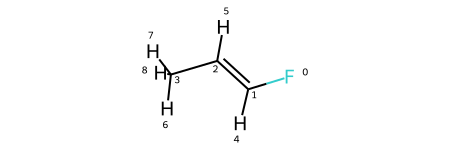

In [51]:
smiles = "F/C=C/C"
mol_trans = Chem.MolFromSmiles(smiles)
mol_trans = Chem.AddHs(mol_trans)
Chem.AllChem.EmbedMolecule(mol_trans,useRandomCoords=False, randomSeed = 117)
Chem.MolToXYZFile(mol_trans,"trans.xyz")
mol_trans

In [52]:
cat trans.xyz

9

F      2.531086   -0.018901   -0.127428
C      1.247998   -0.409791   -0.108192
C      0.290031    0.466354    0.026514
C     -1.140194    0.045176    0.049478
H      1.000126   -1.460952   -0.204970
H      0.479347    1.517127    0.126003
H     -1.255347   -1.004178   -0.314946
H     -1.694646    0.764347   -0.567021
H     -1.458401    0.100818    1.120562


In [53]:
mol_trans1 = gto.M(atom = "trans.xyz")
mol_trans1.basis = "6-31G"
mf1 = mol_trans1.KS()
mf1.xc = 'b3lyp'

In [59]:
mf1.kernel()

converged SCF energy = -214.249799819274


-214.24979981927356

In [57]:
resultado_trans =[mf1.kernel()]

converged SCF energy = -214.249799819273


# Molecula Cis rotada(90°)

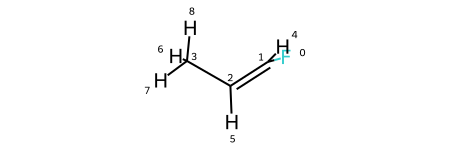

In [41]:
Chem.AllChem.SetDihedralDeg(mol_cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(mol_cis, "90.xyz")
mol_cis

In [42]:
cat 90.xyz

9

F      1.874246    0.262754    1.331355
C      1.324428    0.114406    0.086771
C      0.211875   -0.600289   -0.107579
C     -1.080091    0.141775   -0.008462
H      1.769638    0.570620   -0.789248
H      0.255235   -1.675106   -0.327775
H     -1.411267    0.291329    1.031244
H     -1.860128   -0.435483   -0.531530
H     -0.982917    1.128011   -0.520291


In [61]:
mol_90 = gto.M(atom = "90.xyz")
mol_90.basis = "6-31G"
mf2 = mol_90.KS()
mf2.xc = 'b3lyp'

In [62]:
mf2.kernel()

converged SCF energy = -214.08748631938


-214.08748631938016

In [70]:
resultado_CA = [mf2.kernel()]

converged SCF energy = -214.08748631938


# Grafico

In [66]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-pyw7po52
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-pyw7po52
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9465 sha256=f6111a8676ffa7fa685428bc1df84c8375055315d9cb2594517a3cc03215dc8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fqhdvlq9/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


converged SCF energy = -214.251990680734
converged SCF energy = -214.08748631938
converged SCF energy = -214.249799819273


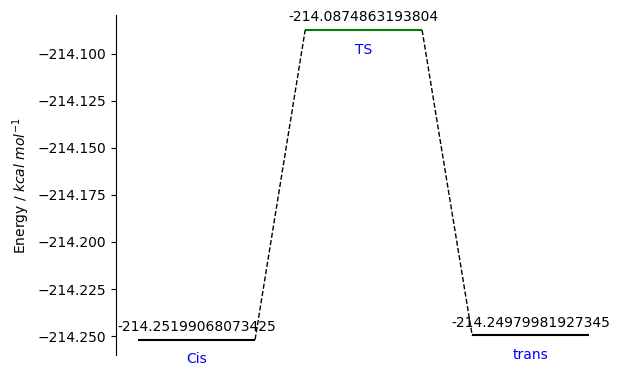

In [69]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(mf.kernel(),'Cis')
diagram.add_level(mf2.kernel(),'TS',color='g')
diagram.add_level(mf1.kernel(),'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel


# ¿Reacción endotérmica o exotérmica?

In [71]:
E_reactante = mf.kernel()

converged SCF energy = -214.251990680734


In [72]:
E_producto = mf1.kernel()

converged SCF energy = -214.249799819274


In [73]:
E_entalpia = E_producto - E_reactante
E_entalpia

0.0021908614606331867

Entonces debido a que la energía de entalpia resulta positiva podemos afirmar que es una reacción  **Exotermica**

In [74]:
E_comp_act = mf2.kernel()

converged SCF energy = -214.087486319381


In [75]:
E_act = E_comp_act - E_reactante
E_act

0.16450436135346536